In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

df=pd.read_csv('card_transdata.csv')

In [69]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [70]:
df.isnull().head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [71]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [72]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [73]:
#convert float data types column to integer

df['repeat_retailer']=(df['repeat_retailer']).astype(int)
df['used_chip']=(df['used_chip']).astype(int)
df['used_pin_number']=(df['used_pin_number']).astype(int)
df['online_order']=(df['online_order']).astype(int)
df['fraud']=(df['fraud']).astype(int)
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int32
used_chip                           int32
used_pin_number                     int32
online_order                        int32
fraud                               int32
dtype: object

In [74]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


0    912597
1     87403
Name: fraud, dtype: int64


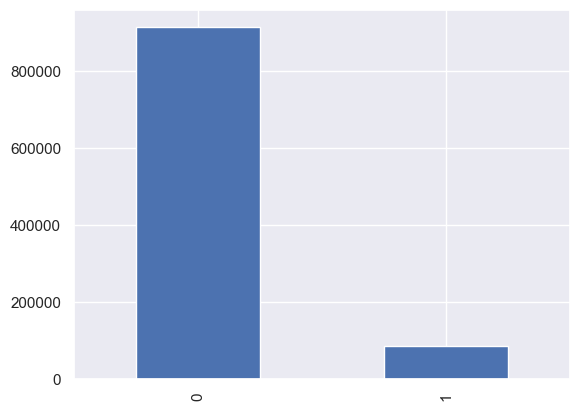

In [75]:
# counting 1 and 0 value in fraud column

color_wheel={1: "#0392cf", 2: "#7bc043"}
colors = df['fraud'].map(lambda x:color_wheel.get(x+1))
print(df.fraud.value_counts())
p=df.fraud.value_counts().plot(kind="bar")

<AxesSubplot: xlabel='fraud', ylabel='count'>

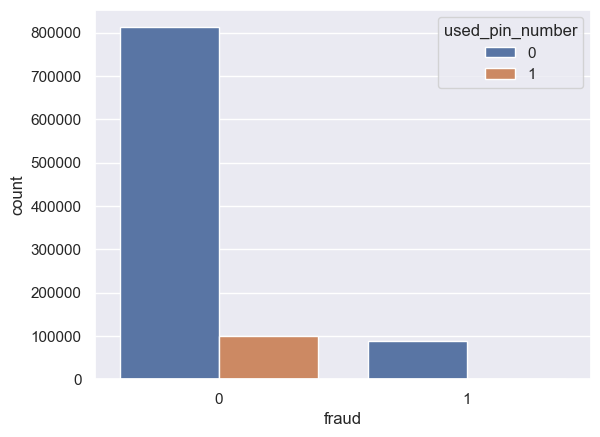

In [76]:
sns.countplot(data=df , x="fraud", hue="used_pin_number")

<AxesSubplot: xlabel='fraud', ylabel='count'>

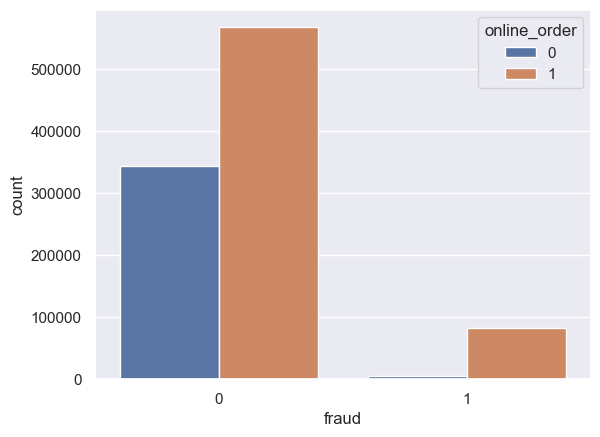

In [77]:
sns.countplot(data=df , x="fraud",hue="online_order")

In [78]:
x= df.drop('fraud', axis=1)
y=df['fraud']

In [79]:
# test size 20% and train size 80%

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [80]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
y_pred = dtree.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 99.998 %


In [82]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [83]:
y_pred=nb.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 95.1595 %


In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc =RandomForestClassifier()
rfc.fit(x_train,y_train)

In [ ]:
y_pred=rfc.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 100.0 %


In [67]:
from sklearn.neural_network import MLPClassifier

nn=MLPClassifier()
nn.fit(x_train,y_train)

MLPClassifier()

In [ ]:
y_pred=nn.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

In [ ]:
y_pred=lr.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix